In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
import seaborn as sns

In [2]:
np.random.seed(42)
n_samples = 300
X = np.random.uniform(-3, 3, (n_samples, 2))

In [3]:
threshold = 4
y = np.where(X[:, 0]**2 + X[:, 1]**2 < threshold, 1, 0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
svm_model = SVC(kernel='poly', degree=2, C=1.0)
svm_model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [6]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.96      0.98        25

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90



[[65  0]
 [ 1 24]]


<Axes: >

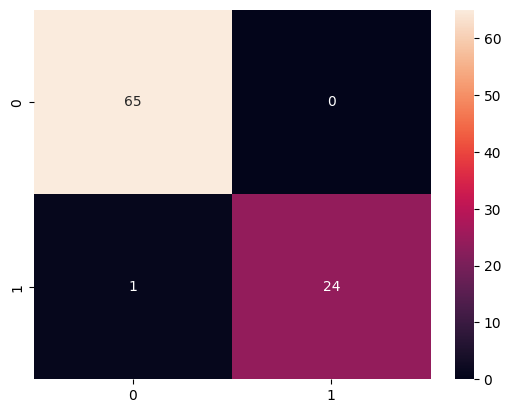

In [13]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, annot=True)

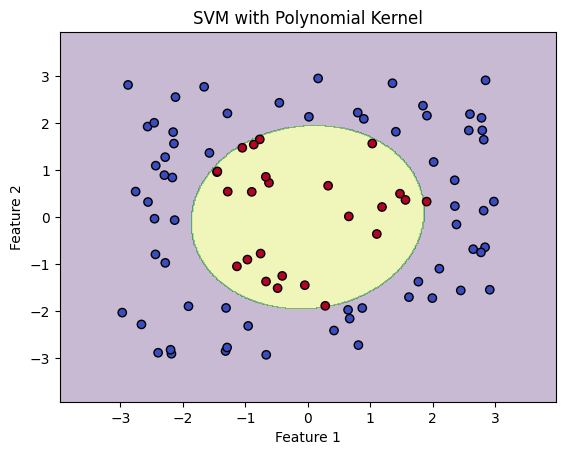

In [7]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_model, X_test, y_test)